In [40]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
import warnings 
warnings.simplefilter('ignore')


In [42]:
train = pd.read_csv('data/train.csv.gz', compression='gzip')
test = pd.read_csv('data/test.csv.gz', compression='gzip')

In [43]:
train.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
0,127860,Double bedroom in cottage Twickenham (sleeps 1-2),"One gorgeous, light-filled double bedroom (sleeps 1-2) Shared bathroom, with bath & shower Beautiful cottage, near Twickenham Green, 15 mins walk to Twickenham stadium Last minute bookings possible. Bespoke packages can be arranged. The host (Andy) is usually in residence, but my absence can be arranged (which would free up a small single bed, sleeps one)","A beautiful, light-filled double bedroom is our gorgeous cottage in the leafy London suburb of Twickenham. The cottage is well equipped to give you a comfortable stay with all the necessary amenities, Twickenham rugby stadium 15 mins walk and London Waterloo a fast 20 min train ride away. The house has a lovely lounge with cable TV and an indoor fireplace, internet access, a fully equipped kitchen with a washing machine. One double bedroom, one single plus a fold out sofa-bed in the lounge means that four people can be comfortably accommodated. The cottage is ideally located for exploring London. It is only a 20 min train journey, but busy London feels like a world away in the peace and quiet of our Twickenham home! It's in a great location for the river Thames (a short walk away), the royal parks of Richmond, Hampton Court Palace, and rugby at Twickenham stadium. If you have a car there is on street parking outside. Please just get in touch if you have any questions, we look forwa","One gorgeous, light-filled double bedroom (sleeps 1-2) Shared bathroom, with bath & shower Beautiful cottage, near Twickenham Green, 15 mins walk to Twickenham stadium Last minute bookings possible. Bespoke packages can be arranged. The host (Andy) is usually in residence, but my absence can be arranged (which would free up a small single bed, sleeps one) A beautiful, light-filled double bedroom is our gorgeous cottage in the leafy London suburb of Twickenham. The cottage is well equipped to give you a comfortable stay with all the necessary amenities, Twickenham rugby stadium 15 mins walk and London Waterloo a fast 20 min train ride away. The house has a lovely lounge with cable TV and an indoor fireplace, internet access, a fully equipped kitchen with a washing machine. One double bedroom, one single plus a fold out sofa-bed in the lounge means that four people can be comfortably accommodated. The cottage is ideally located for exploring London. It is only a 20 min train journey, bu",none,"Very, very safe area, great transport links and tons to do in the local Richmond area (eg the River Thames is a short walk, Richmond & Bushy Parks are a short distance away)",We have a super-gorgeous cat,Twickenham Rugby Stadium is 15 mins walk Waterloo is around 20 mins away on a fast train The River Thames is a short walk There are lots of great pubs and restaurants nearby,"You'll have full use of the cottage, two reception rooms (one with a surprisingly comfortable fold-out sofa-bed), one double bedroom, and shared bathroom. There is a fabulous kitchen / diner and Japanese garden.","The host (Andy) is usually in residence, but my absence can be arrange (which frees up a small single bedroom)","While the house is a great space to entertain, please be respectful of our lovely neighbours! Vaping is not only allowed, it is positively encouraged. You can smoke in the garden.",161720,2010-07-09,"My wife and I work in property development. She is currently working in Portugal on a long-te

In [ ]:
pd.set_option('display.multi_sparse', False)
pd.set_option('display.max_colwidth', -1)

## Работа с пропусками

In [44]:
import missingno as msno

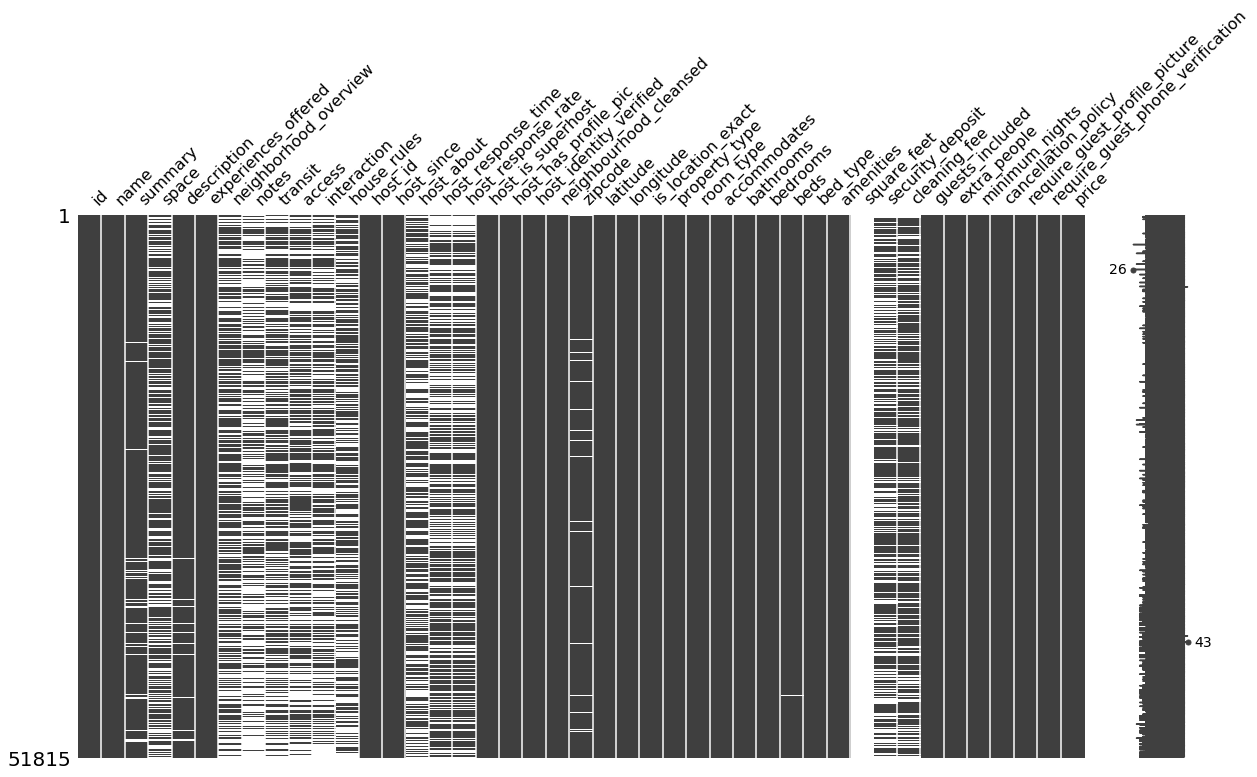

In [45]:
msno.matrix(train, inline=True, sparkline=True, figsize=(20, 10), sort=None)

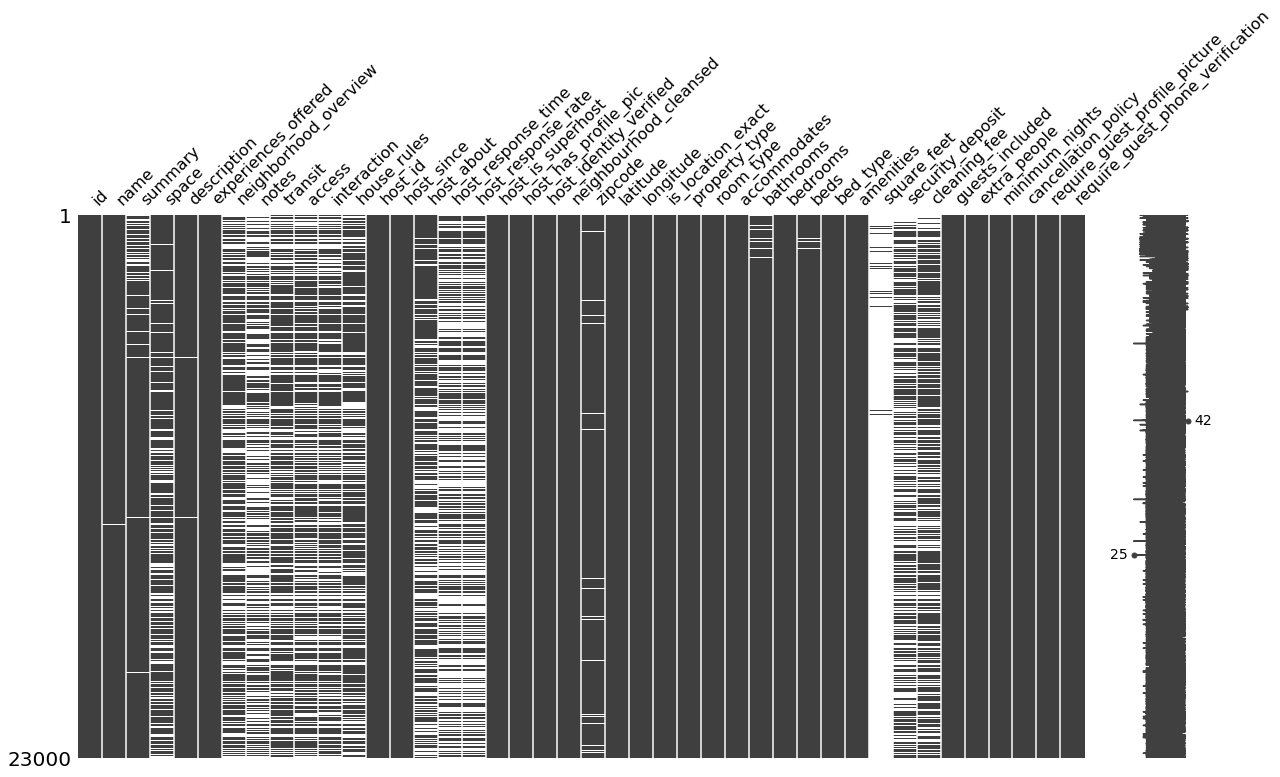

In [46]:
msno.matrix(test, inline=True, sparkline=True, figsize=(20, 10), sort=None)

#### Смотрим на target

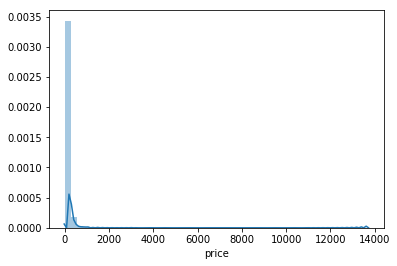

In [47]:
# Если просто посмотреть распределение - ничего не видно

sns.distplot(train.price)

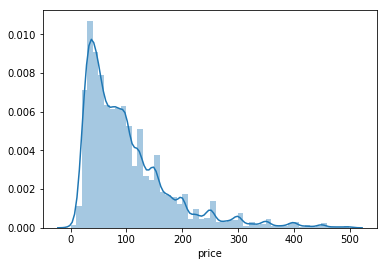

In [48]:
# Посмотрим на начало

sns.distplot(train.price[train.price < 500])

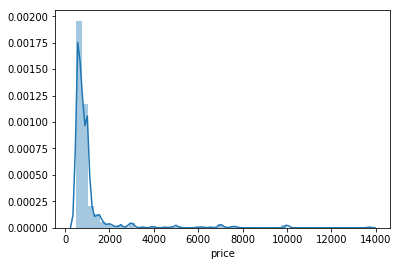

In [49]:
# Посмотрим на хвост

sns.distplot(train.price[train.price > 500])

In [ ]:
# Полюбопытствуем что за квартиры за 12000$ в день

In [50]:
train[train.price > 12000][['description', 'neighbourhood_cleansed', 'accommodates']]

,description,neighbourhood_cleansed,accommodates
44966,"All non-alcoholic minibar food and beverages are included Room Size 292 sqm Two terraces overlooking Piccadilly Circus, Westminster and Regent Street Three king beds Circular master suite with large entertaining area 98 inch HD TV Marble dining table to seat six Butlers pantry/kitchenette LED lighting system Three Carrara Marble Bathrooms Rainfall showers Oversized Ming green bath tub Bathroom mirror TV screen Whisper Quiet sound proofing DJ system and wireless music connectivity 24hr in-room dining Air Conditioning Balcony Bang & Olufsen in-room entertainment system and media hub Butler Service Butler’s Pantry with complimentary Nespresso coffee machine Complimentary access to Akasha Holistic Wellbeing Centre with full use of the large lap pool, state-of-the-art-gym, Jacuzzi, sauna and steam room Complimentary daily newspaper and choice of magazines Complimentary Wi-Fi throughout the hotel Designer British bathroom amenities from Floris Frette linen Luxury bathrobe and slippers Mini B",Westminster,7


In [ ]:
# Посмотрим на логарифм таргета

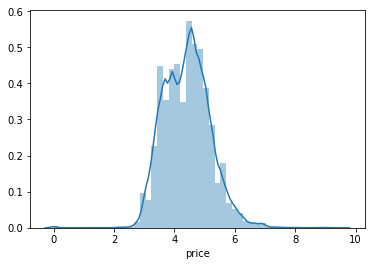

In [51]:
sns.distplot(np.log1p(train.price))

#### Признак про площадь кажется классным, посмотрим на него

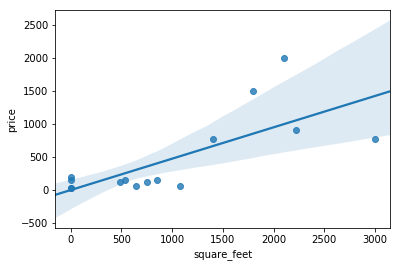

In [52]:
sns.regplot('square_feet', 'price', train[['square_feet', 'price']].dropna())

#### Cмотрим на room_type сравниваем распределение на трейне и тесте, распределение таргета, проверяем что признак можно считать порядковым

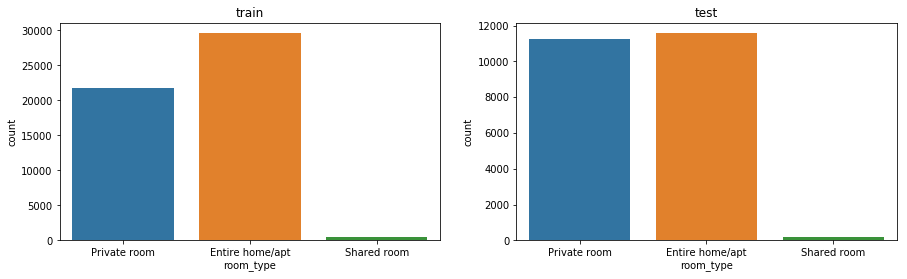

In [53]:
fig, ax=plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('train')
sns.countplot(train.room_type)
plt.subplot(1, 2, 2)
plt.title('test')
sns.countplot(test.room_type)

<Figure size 720x720 with 0 Axes>

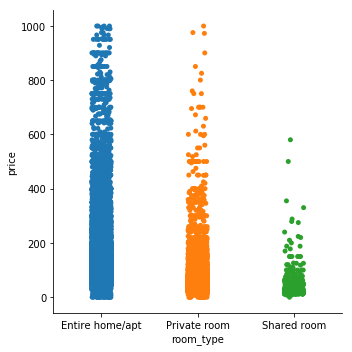

In [54]:
plt.figure(figsize=(10, 10))
sns.catplot(x='room_type', y='price', data=train[train.price < 1000])

In [ ]:
# Любопытствуем где находится общага за 500 баксов за место

In [55]:
train[(train.room_type == 'Shared room')&(train.price > 500)][['description', 'neighbourhood_cleansed']]

,description,neighbourhood_cleansed
30474,It’s an amazing place,Westminster


#### Порисуем категориальный признак большой мощности

In [56]:
train.neighbourhood_cleansed.nunique()

33

In [ ]:
# Вот что получится если нарисовать графики в лоб

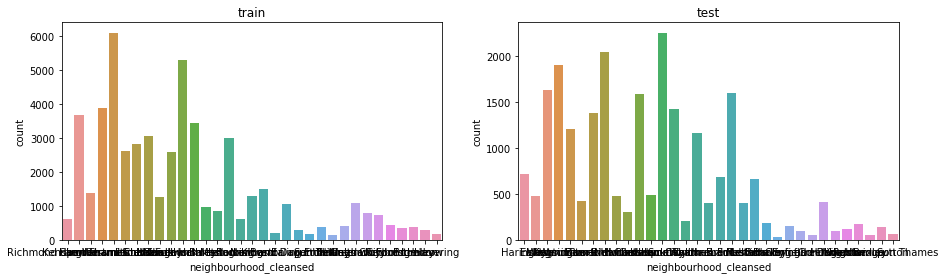

In [57]:
fig, ax=plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('train')
sns.countplot(train.neighbourhood_cleansed)
plt.subplot(1, 2, 2)
plt.title('test')
sns.countplot(test.neighbourhood_cleansed)

In [ ]:
# Вот как сделать их информативными

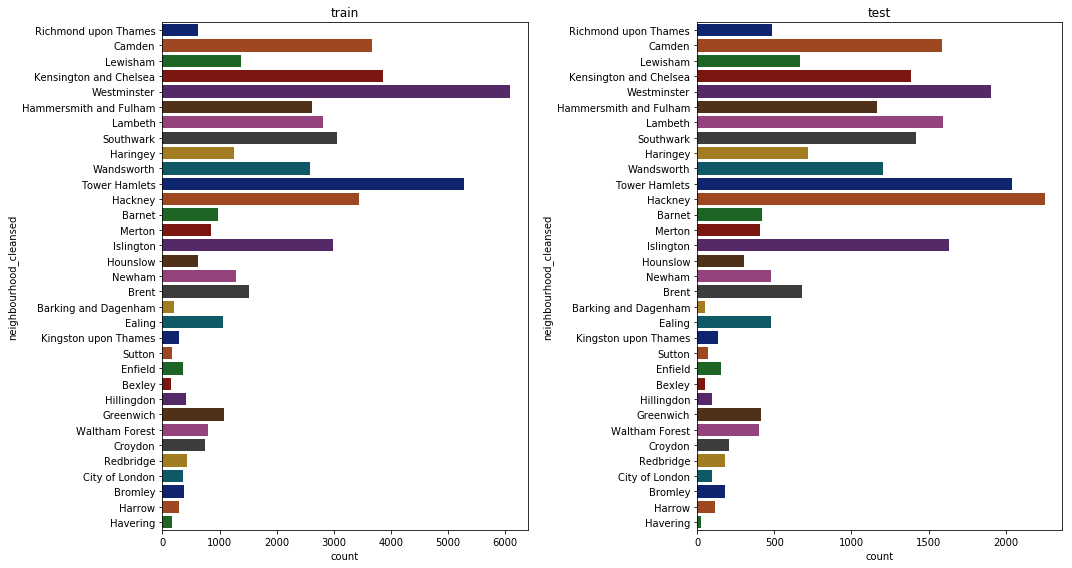

In [58]:
fig, ax=plt.subplots(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title('train')
g=sns.countplot(y=train.neighbourhood_cleansed, order=train.neighbourhood_cleansed.unique(),
                orient='v', palette='dark');
#plt.xticks(rotation='vertical')
plt.subplot(1, 2, 2)
plt.title('test')
g=sns.countplot(y=test.neighbourhood_cleansed, order=train.neighbourhood_cleansed.unique(),
                orient='v', palette='dark');
fig.tight_layout()
#plt.xticks(rotation='vertical');

In [ ]:
# Нарисуем боксплоты

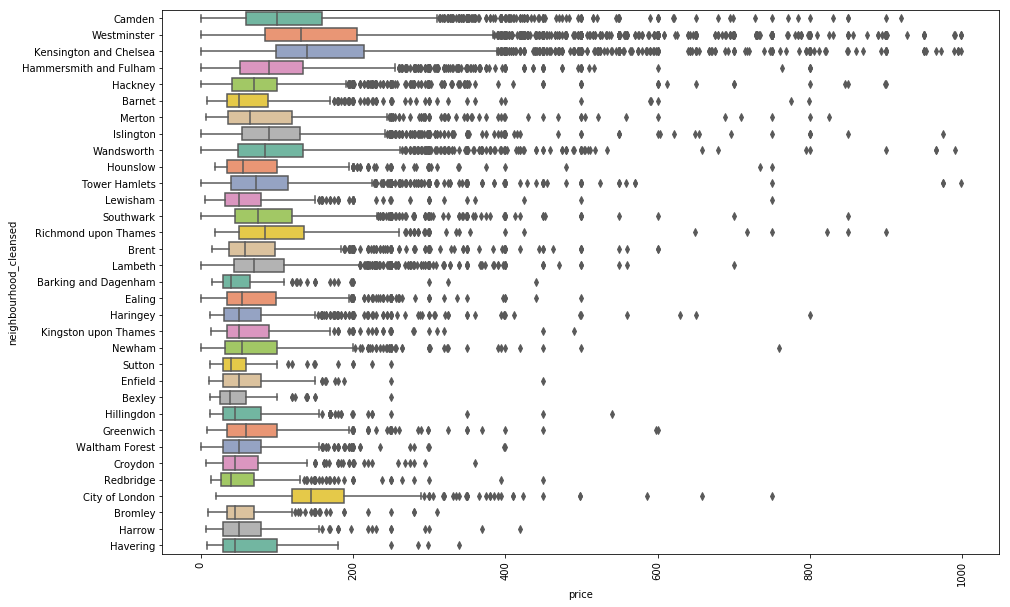

In [59]:
plt.figure(figsize=(15, 10))
sns.boxplot(y='neighbourhood_cleansed', x='price', data=train[train.price < 1000], orient='h', palette='Set2')
plt.xticks(rotation='vertical');

In [ ]:
# На логарифм смотреть приятнее

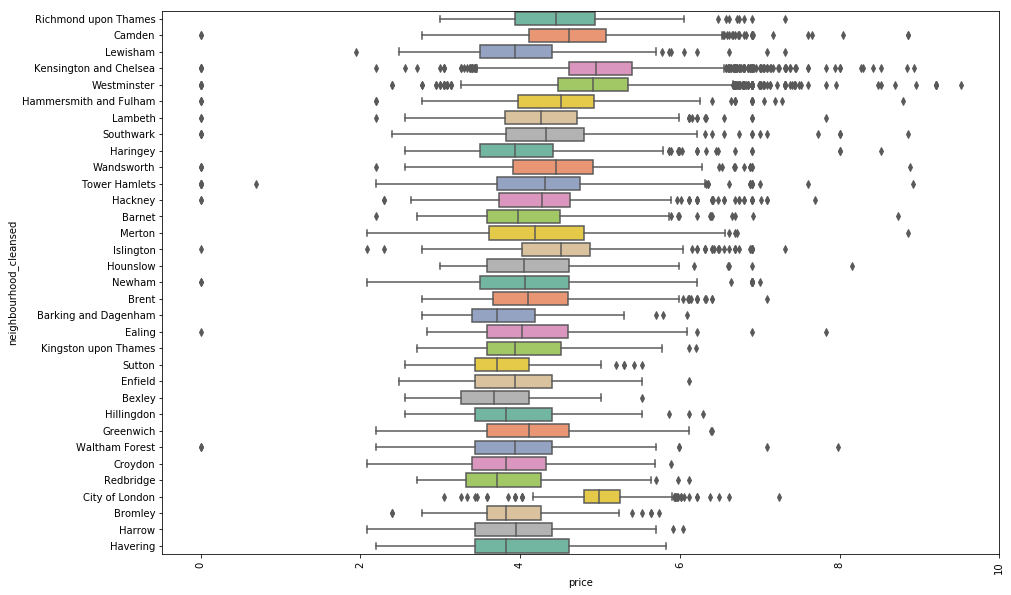

In [60]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=train.neighbourhood_cleansed, x=np.log1p(train.price), orient='h', palette='Set2')
plt.xticks(rotation='vertical');

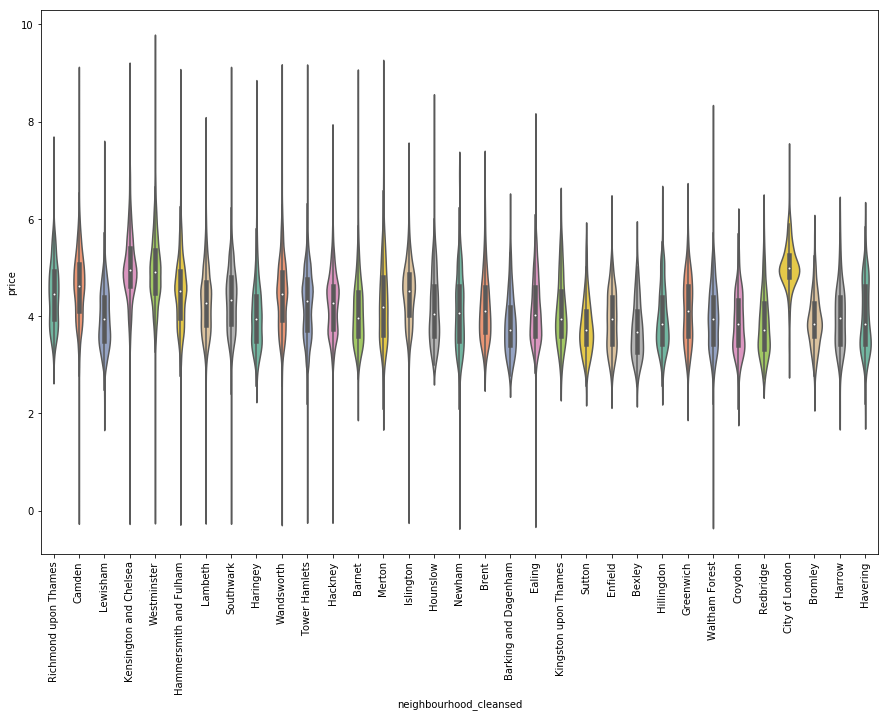

In [61]:
plt.figure(figsize=(15, 10))
sns.violinplot(x=train.neighbourhood_cleansed, y=np.log1p(train.price),  palette='Set2')
plt.xticks(rotation='vertical');

In [ ]:
# Рассмотрим какой-нибудь район поближе

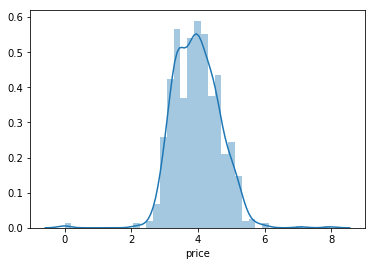

In [62]:
sns.distplot(np.log1p(train[train.neighbourhood_cleansed == 'Waltham Forest'].price))

In [ ]:
# Что там за 0? 

In [63]:
train[train.price < 5].shape

(41, 43)

In [ ]:
# 41 квартира с 0 ценой. Для неленивых: можно поисследовать что у них общего и поискать похожие квартиры в тесте

In [64]:
train[train.price < 5].head(2)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
2286,14352218,Bedroom for 2 in huge 3000sqf+ Hackney warehouse,Room for 2 in huge 3000sqf+ warehouse flat near London Fields. Space to work. Creative and friendly housemates.,"It's a huge 6 bed apartment with 2 big bathrooms (most of us are in creative professions with varying working hours so there's never a queue for the bathroom in the morning!) We have pretty much everything you could need here... a huge kitchen with a double stove/oven, a dishwasher, every utensil and appliance under the sun... a huge dining area that seats 14, a big living area where we often chill together of an evening and also a separate office area for anyone who works from home and even a photography studio which we often hire out for photo shoots during the day, so we have lots of fun and creative people around. The room is furnished with an extremely comfy 5 star hotel quality King size bed (4000 pocket springs) and some shelves and set of drawers. My belongings will still be in the room by I'll clear out the shelves for you. There's also a projector setup in the room which you'd be welcome to use We are open to allowing pets dependent on the pet. The housemates. Alex - Free","Room for 2 in huge 3000sqf+ warehouse flat near London Fields. Space to work. Creative and friendly housemates. It's a huge 6 bed apartment with 2 big bathrooms (most of us are in creative professions with varying working hours so there's never a queue for the bathroom in the morning!) We have pretty much everything you could need here... a huge kitchen with a double stove/oven, a dishwasher, every utensil and appliance under the sun... a huge dining area that seats 14, a big living area where we often chill together of an evening and also a separate office area for anyone who works from home and even a photography studio which we often hire out for photo shoots during the day, so we have lots of fun and creative people around. The room is furnished with an extremely comfy 5 star hotel quality King size bed (4000 pocket springs) and some shelves and set of drawers. My belongings will still be in the room by I'll clear out the shelves for you. There's also a projector setup in the roo",none,The location is very convenient for Hackney night life and public transport.,NaN,"Transport: There are several frequent buses from Mare Street (bus stop 'King Edward's Road') which is less than 2 minutes walk away. There are direct buses to Shoreditch 10-15 minutes (26,48,55) Bethnal Green Central Line Underground Station 5-10 minutes (106, 254). Central line takes you to Oxford Circus in about 13 minutes. It takes 7 and 15 minutes respectively to get to London Fields overground train station (direct trains to Liverpool Street Station) and Hackney Central overground station (Direct trains to Camden, Hampsted Heath and Kew Gardens). There are plenty of Barclay's Cycle Hire docking stations nearby for cheap bike hire. Plenty of options! If you need parking I can order £4 a day parking vouchers.",NaN,NaN,NaN,60351868,2016-02-25,I'm a musician who has been a resident of the Big Smoke for over a decade. I have had a great experience both as a host and guest on Airbnb. I'm always tidy and respectable and will treat your home as if it was my own.,within an hour,100%,t,t,t,Hackney,E9 7QL,51.539643,-0.054606,f,Loft,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""Smoking allowed"",""Pets allowed"",

#### Поищем еще какие-ниубдь проблемы с данными

In [65]:
# На текстовые поля смотреть не будем

train.describe(include='all').T[15:]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
host_response_time,31129,4,within an hour,21171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,31126,74,100%,22511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,51804,2,f,45209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_has_profile_pic,51804,2,t,51680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,51804,2,f,35314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_cleansed,51815,33,Westminster,6094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,50342,23654,E1,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,51815,NaN,NaN,NaN,51.5091,0.0455753,51.2948,51.4862,51.5133,51.5355,51.6792
longitude,51815,NaN,NaN,NaN,-0.127937,0.0927812,-0.501305,-0.187733,-0.126478,-0.0702392,0.285395
is_location_exact,51815,2,t,30641,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Доплата за нового человека кажется отличным признаком. 

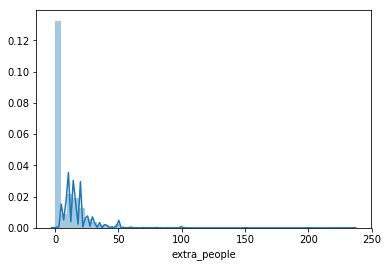

In [66]:
sns.distplot(train.extra_people)

In [ ]:
# Смотрим, что пики означают, что чаще всего за дополнительных людей просят красивые, кратные 5 суммы

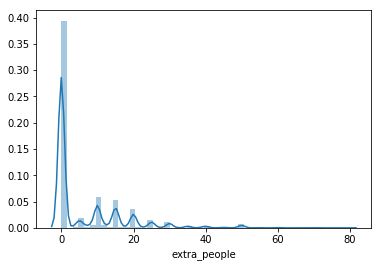

In [67]:
sns.distplot(train.extra_people[train.extra_people < 80])

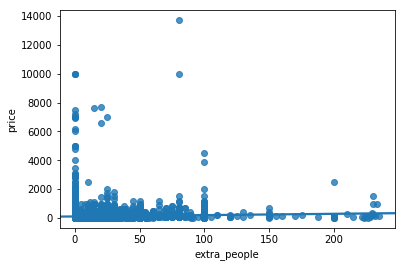

In [68]:
sns.regplot('extra_people', 'price', train)

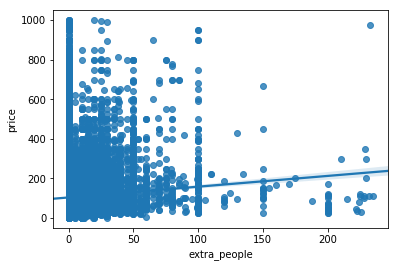

In [69]:
sns.regplot('extra_people', 'price', train[train.price < 1000])

#### Поисследуем число человек которые влезают в квартиру

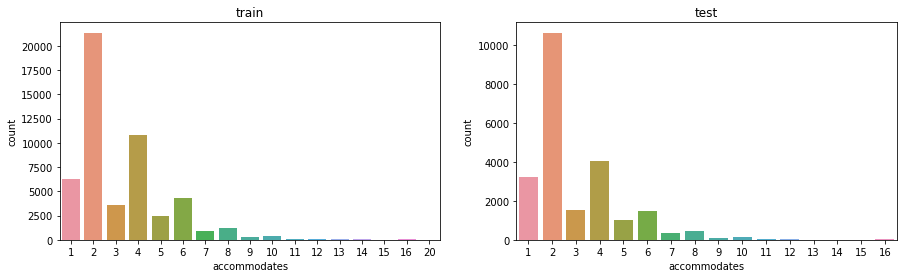

In [70]:
fig, ax=plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('train')
sns.countplot(train.accommodates)
plt.subplot(1, 2, 2)
plt.title('test')
sns.countplot(test.accommodates)

In [ ]:
# Видим что в целом все работает как надо - чем больше людей влезает в дом, тем он дороже

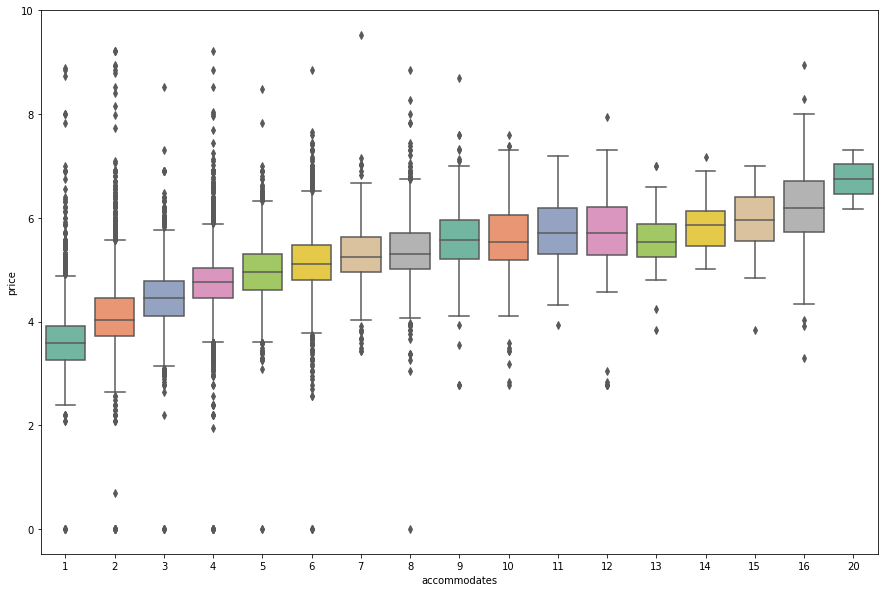

In [71]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=train.accommodates, y=np.log1p(train.price), palette='Set2');

In [ ]:
# Посмотрим взаимодействие между фичами, для простоты возьмем все числовые фичи

In [72]:
train[['host_response_rate','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights','price']].head(3)

,host_response_rate,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,price
0,NaN,2,1.0,1.0,1.0,NaN,300.0,10.0,1,10.0,2,1000.0
1,NaN,8,2.5,3.0,4.0,1400.0,771.0,NaN,1,0.0,14,771.0
2,NaN,6,3.0,3.0,3.0,1800.0,600.0,NaN,1,0.0,14,1500.0


In [73]:
train['host_response_rate']=train['host_response_rate'].str[:-1].astype(float)

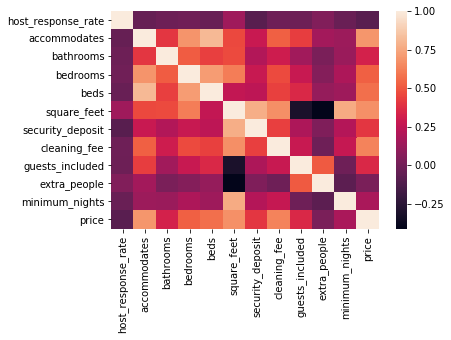

In [74]:
sns.heatmap(train[['host_response_rate','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights','price']].corr(method='spearman'))

In [ ]:
# Смотрим как выглядит корреляция на самом деле

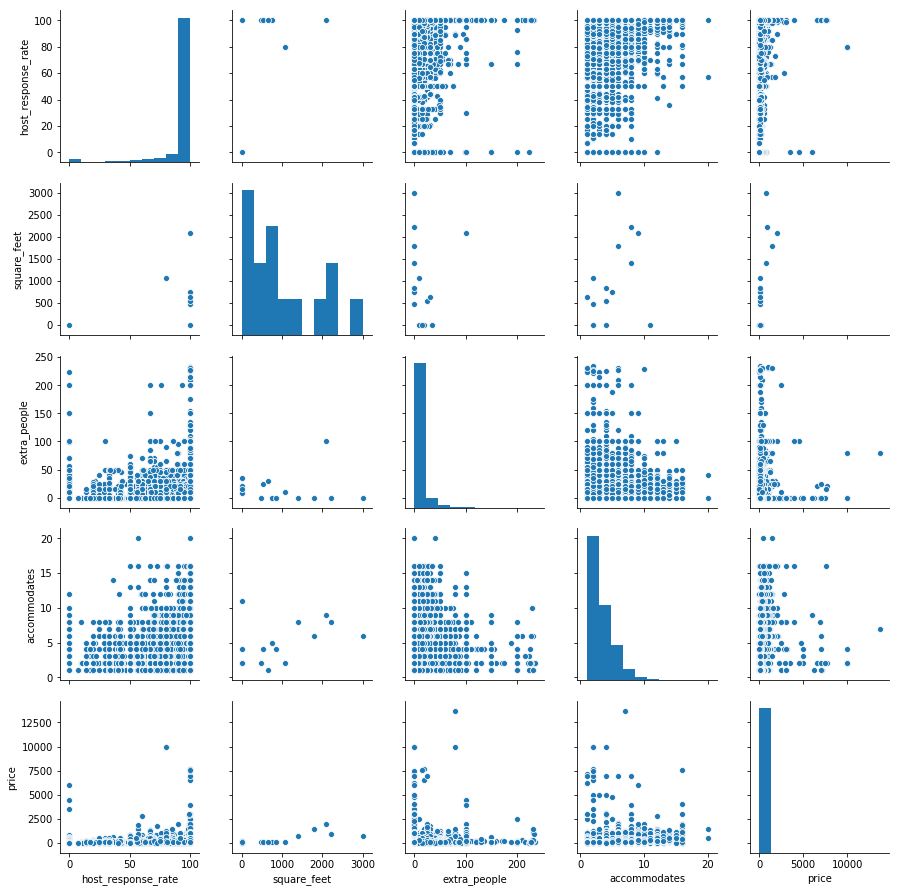

In [75]:
sns.pairplot(train[['host_response_rate', 'square_feet',
       'extra_people', 'accommodates', 'price']])

#### Быстро визуализируем кучу координат, смотрим где находится район с самыми дорогими хостелами

In [76]:
import gmplot

In [77]:
gmap = gmplot.GoogleMapPlotter(0, 0, 2)
gmap.coloricon = "http://www.googlemapsmarkers.com/v1/%s/" # эта строчка нужна для пользователей windows
gmap.scatter(train[train.neighbourhood_cleansed=='Westminster'].latitude,  
             train[train.neighbourhood_cleansed=='Westminster'].longitude, 
             'cornflowerblue', marker=True)
gmap.draw("mymap2.html")

gmplot ничего в ноутбуке не рисует, он сохраняет html файл, который вам ничего не покажет без интернета. Если интернет есть, нарисует все на гуглокарте.

Есть штуки намного красивее (Follum, Geopandas, Plotly) и рисуют в ноутбуке, но такую кучу точек они будут рисовать долго. 